Total amount of images: 354
Dataset contains 708 image pairs
Train contains 566 image pairs
Validation contains 70 image pairs
Test contains 72 image pairs


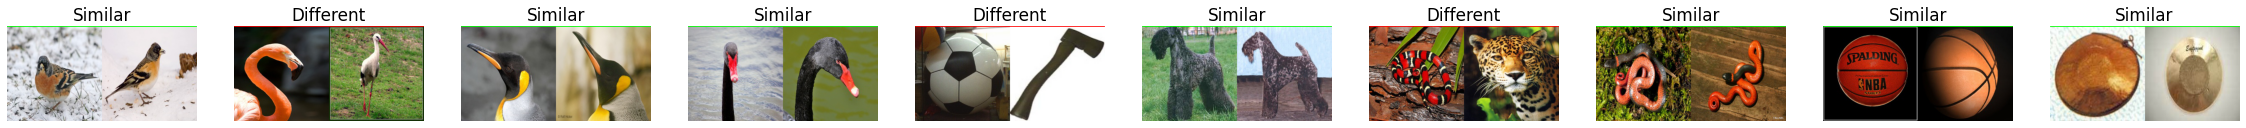

In [1]:
import sys
sys.path.append('../../utility')
import util
import numpy as np

folders = util.load_images('../../data/dataset_pairs')
data, labels = util.create_pairs(folders)
data, labels = util.shuffle_data(data, labels)
data_split, labels_split = util.split_data(data, labels)
data_train, data_val, data_test = data_split
labels_train, labels_val, labels_test = labels_split

print('Dataset contains', data.shape[0], 'image pairs')
print('Train contains', data_train.shape[0], 'image pairs')
print('Validation contains', data_val.shape[0], 'image pairs')
print('Test contains', data_test.shape[0], 'image pairs')

util.visualize(data_train, labels_train)

In [2]:
from keras.models import load_model

embedding_extractor = load_model('./triplet_loss_embedding_extractor.h5')

In [3]:
similarity = util.get_similarity_from_embedding(embedding_extractor, data_test)

Took 7.47 seconds to predict 72 image pairs
Prediction time: 0.10 seconds


Best accuracy: 0.9722222222222222
mobilenet
- Amount of TP: 35
- Amount of TN: 35
- Amount of FP: 1
- Amount of FN: 1
- AUC score: 0.9938271604938272
- Accuracy: 0.9722222222222222
- Recall: 0.9722222222222222
- Precision: 0.9722222222222222
- F1: 0.9722222222222222
- Kappa: 0.9444444444444444


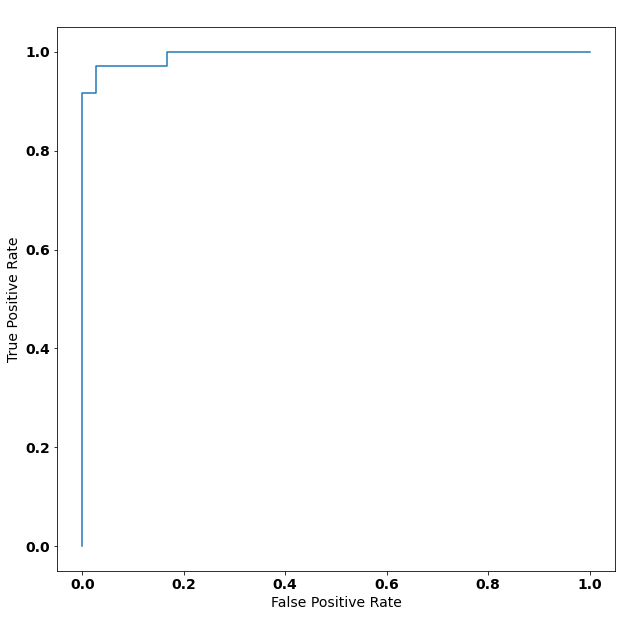

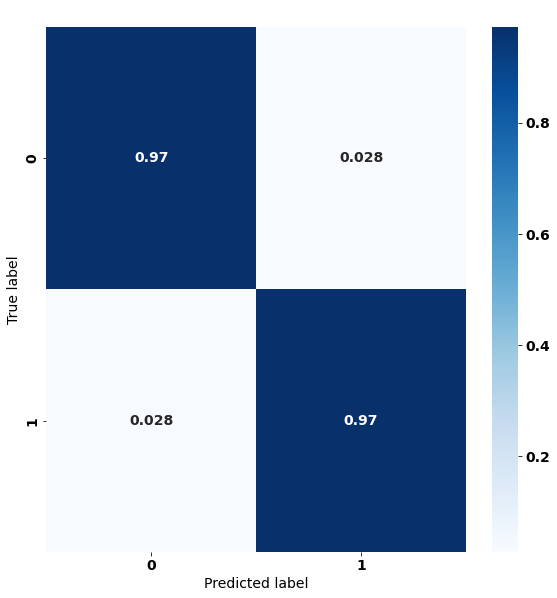

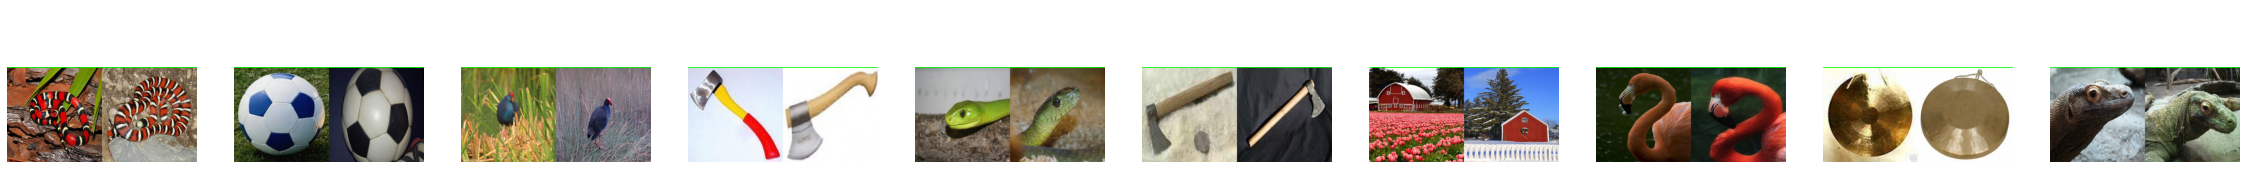

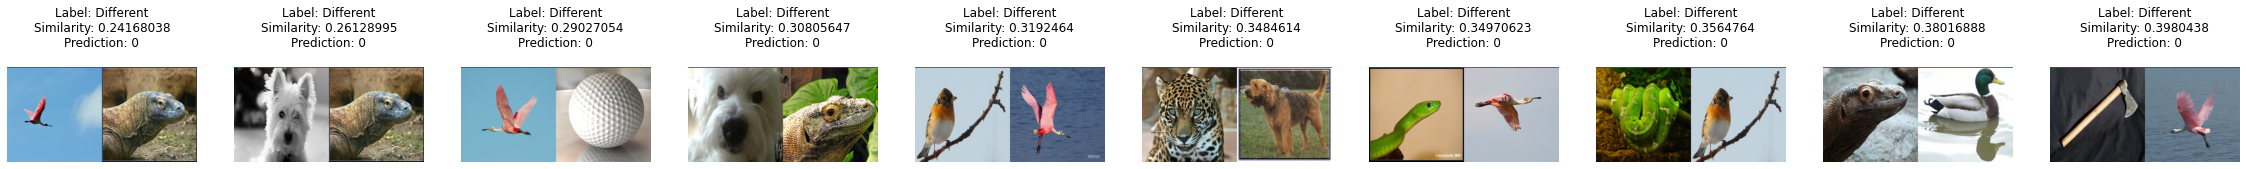

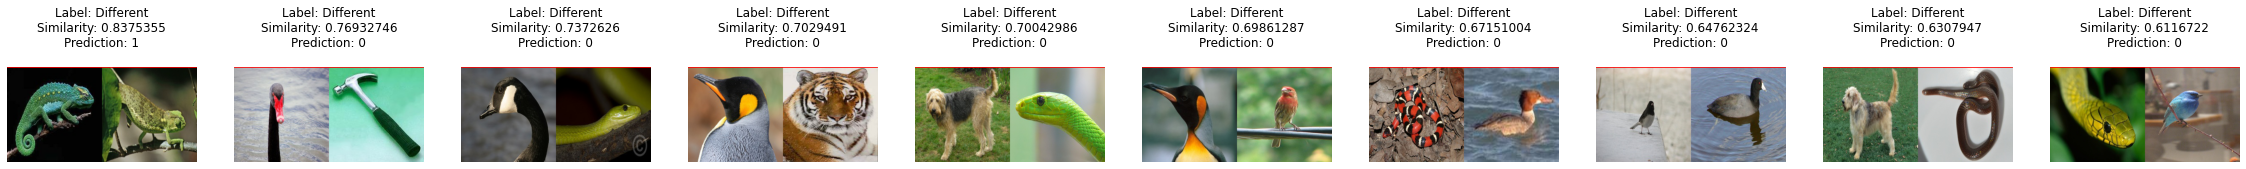

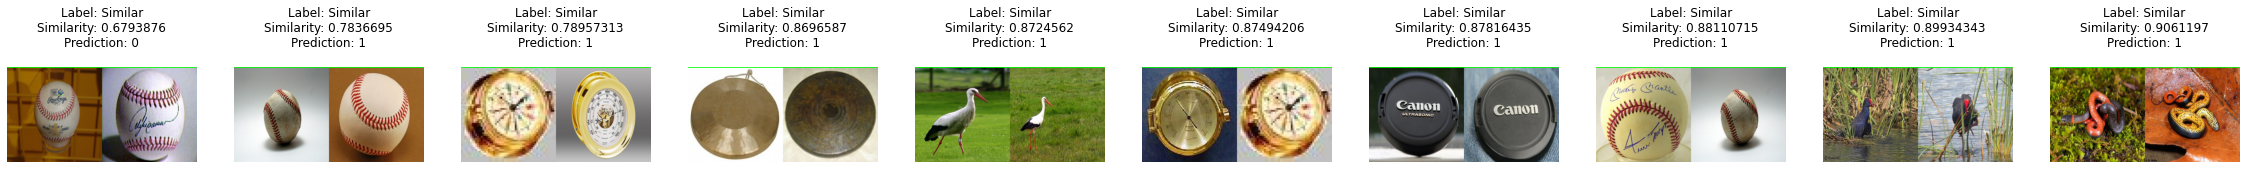

Threshold:  0.7700000000000006


In [4]:
util.evaluate(data=data_test, labels=labels_test, similarity=similarity, name="triplet")